In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines



exps = ["6","600","800"]
methods = ["Leiden","Louvain", "Lprop"]
for exp in exps:
    for met in methods:
        path_2_file = f"../../experiment{exp}/statistics/Cluster_tracker/{met}/tracking_all_branches_largest_cluster_in_each_slice.txt"
        
        ALL_branches = []

        branches = []
        switch_ids = []
        switch_sizes = []
     
        path_to_save = f"../../p_2_overleaf/experiment{exp}/{met}/"

        with open(path_2_file,"r") as inff:
            lol = inff.readline()
            start = inff.readline()
            start = start.split(":")
            id_m1 = int(start[0])
            num_slices = int(start[-1])
            b_path_m1 = start[1].strip("[]")
            b_path_m1 = b_path_m1.split(",")
            b_path_m1 = [int(i) for i in b_path_m1]
            sizes_m1 = start[-2].strip("[]")
            sizes_m1 = sizes_m1.split(",")
            sizes_m1 = [int(i) for i in sizes_m1]

            branches.append(b_path_m1)
            switch_ids.append(id_m1)
            switch_sizes.append(sizes_m1)
            ALL_branches.append(b_path_m1)

            lines = inff.readlines()
            for line in lines:
                vals = line.split(":")
                id = int(vals[0])
                b_path = vals[1].strip("[]")
                b_path = b_path.split(",")
                b_path = [int(i) for i in b_path]
                sizes = vals[-2].strip("[]")
                sizes = sizes.split(",")
                sizes = [int(i) for i in sizes]

                
                if b_path[0] != b_path_m1[1]:
                    branches.append(b_path)
                    switch_ids.append(id)
                    switch_sizes.append(sizes)


                b_path_m1 = b_path
                ALL_branches.append(b_path)

   
        max_size = 0 
        for outer in range(len(switch_sizes)):
            sett = switch_sizes[outer]
            if max(sett) > max_size:
                max_size = max(sett)
        print(max_size)
        

        b = len(switch_ids)
        #print(switch_ids)

        all_L = len(ALL_branches)
        #a = reversed(a)


        jump_back_in_id = []
        testi = [0]*b
        jump_back_in_path = [0]*b
        
        m = b - 1
        for t in range(0,b):
            tt = t + m 
            c_p = branches[tt][0]
            c_id = switch_ids[tt]    # slice num of slice checked
            for i_t in range(0,c_id-1):     #goes up to idx  = slice num-1 = correct
                o_id = i_t + 1 #switch_ids[i_t]      #should be a slice id, not idx
                o_p = ALL_branches[i_t][c_id-o_id]
                if c_p == o_p:
                    #print(f"S{c_id}[0] = {c_p}      S{o_id}[{c_id-o_id}] = {o_p}")
                    jump_back_in_id.append(c_id)
                    jump_back_in_path[tt]= o_id
                    testi[tt] = 1
                    break

            m -= 2

        jump_back_in_id = set(jump_back_in_id)
        switch_ids = np.array(switch_ids)
        #print(testi)
   
        a = range(len(switch_ids))
        a = reversed(a)
        slices = [i for i in range(1,num_slices+1)]
        cmap = cm.get_cmap('nipy_spectral', len(switch_ids))
        for j in a:
            idx = switch_ids[j]
            start_id = idx - 1
            x = slices[start_id:]
            y = switch_sizes[j]

            #if idx in jump_back_in_id:
            if testi[j] == 1:
                mark = "v"
                #old_slice_path = jump_back_in_path[j]
                #print(old_slice_path)
                #print(switch_ids)
                #id_old_path = np.where(switch_ids == old_slice_path)[0][0]
                #print(id_old_path)
                #cl = cmap(id_old_path)
                plt.plot(idx,y[0],marker = mark,color = cmap(j))
            else:
                mark= "x"
                cl = cmap(j)
                plt.plot(idx,y[0],marker = mark,color = cmap(j))
                plt.plot(x,y, color = cmap(j))


        for s in slices:
            plt.vlines(s, 0, max_size,linestyles ="solid", colors ="k", alpha = 0.2, linewidth = 0.1)
            
        plt.xlabel("Slice")
        
        x_mark = mlines.Line2D([], [], color='k', marker='x', linestyle='None',markersize=10, label='New path')
        v_mark = mlines.Line2D([], [], color='k', marker='v', linestyle='None',markersize=10, label='Joined path != preceding path')

        plt.legend(handles=[x_mark,v_mark])

        plt.title(f"{met}")
        plt.ylabel("Cluster size")
        #plt.grid()
        #plt.show()
        plt.savefig(path_to_save + "branch.pdf")
        plt.yscale("log")
        plt.savefig(path_to_save + "ylog_branch.pdf")
        plt.clf()
        
        

17
32
40
42
43
44
46
47
48
57
62
63
69
72
73
74
79
87
88
91
92
3
5
6
19
20
36
37
39
41
42
44
45
50
52
53
55
78
79
27
37
39


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines



exps = ["6","600","800"]
methods = ["Leiden","Louvain", "Lprop"]
for exp in exps:
    for met in methods:
        path_2_file = f"../../experiment{exp}/statistics/Cluster_tracker/{met}/tracking_all_branches_largest_cluster_in_each_slice.txt"
        
        check_exp = exp == "6" and met != "Lprop"

        all_dict = {}

        #branches = []
        #switch_ids = []
        #switch_sizes = []

        if check_exp:
            break_dict = {}
            break_of_branch = f"../../experiment{exp}/statistics/Cluster_tracker/{met}/break_off_branches.txt"
            with open(break_of_branch,"r") as bf:
                lines = bf.readlines()
                for line in lines:
                    elems = line.split(",")
                    break_dict[elems[0]] = int(elems[-1]) - int(elems[0]) #Gives correct index, easier

        #print(break_dict)


     
        path_to_save = f"../../p_2_overleaf/experiment{exp}/{met}/"
        first = True

        with open(path_2_file,"r") as inff:
            lol = inff.readline()
            lines = inff.readlines()
            for line in lines:
                vals = line.split(":")
                if first:
                    num_slices = int(vals[-1])
                    first = False
                id = int(vals[0])
                all_dict[str(id)] = {}
                b_path = vals[1].strip("[]")
                b_path = b_path.split(",")
                b_path = [int(i) for i in b_path]
                sizes = vals[-2].strip("[]")
                sizes = sizes.split(",")
                sizes = [int(i) for i in sizes]

                all_dict[str(id)]["branch"] = b_path
                all_dict[str(id)]["size"] = sizes

        
        
        if check_exp:
            for k in break_dict.keys():
                break_idx = break_dict[k]
                all_dict[k]["branch"] = all_dict[k]["branch"][:break_idx]
                all_dict[k]["size"] = all_dict[k]["size"][:break_idx]


        max_size = 0
        for k in all_dict.keys():
            check_sizes = all_dict[k]["size"]
            mm = max(check_sizes)
            if mm > max_size:
                max_size = mm


        switch_dict = {}
        switch_dict["1"] = {"new_path" : True}
        keys_list = list(all_dict.keys())
        for k in range(1,len(keys_list)):
            br_m1 = all_dict[keys_list[k-1]]["branch"]
            br = all_dict[keys_list[k]]["branch"]
            try:
                if br[0] != br_m1[1]:
                    switch_dict[keys_list[k]] = {"new_path" : True}
                
            except IndexError:
                print(f"Slice {keys_list[k-1]} path len = {len(br_m1)}")
                switch_dict[keys_list[k]] = {"new_path" : True}


        #rev_keys = keys_list[::-1]
        rev_switch_keys = list(switch_dict.keys())[::-1]
        count_keys = list(switch_dict.keys())

        for rk in rev_switch_keys:
            count_keys = count_keys[:-1]
            c_p = all_dict[rk]["branch"][0]
            for lk in range(1,int(rk)):#count_keys:  
                slice_key = str(lk)
                try:
                    o_p = all_dict[slice_key]["branch"][int(rk)-lk]
                except IndexError:
                    o_p = -1
                if c_p == o_p:
                    switch_dict[rk]["new_path"] = False
                    break

        rev_switch_keys = list(switch_dict.keys())[::-1]
        count_keys = list(switch_dict.keys())

        #slices = [i for i in range(1,num_slices+1)]
        cmap = cm.get_cmap('nipy_spectral', len(count_keys)) #nipy_spectral
        
        for cc, j in enumerate(rev_switch_keys):
            jj = int(j)
            y = all_dict[j]["size"]
            x = [i for i in range(jj, jj + len(y))]

            if switch_dict[j]["new_path"]:
                mark= "x"
                plt.plot(jj,y[0],marker = mark,color = cmap(cc))
                plt.plot(x,y, color = cmap(cc))
                if x[-1] != num_slices:
                    plt.plot(x[-1],y[-1], marker = "o", color = cmap(cc), markersize = 5)

            else:
                mark = "v"
                plt.plot(jj,y[0],marker = mark,color = cmap(cc))

           

                


        #for s in slices:
            #plt.vlines(s, 0, max_size,linestyles ="solid", colors ="k", alpha = 0.2, linewidth = 0.1)
            
        plt.xlabel("Slice")
        
        x_mark = mlines.Line2D([], [], color='k', marker='x', linestyle='None',markersize=10, label='New path')
        v_mark = mlines.Line2D([], [], color='k', marker='v', linestyle='None',markersize=10, label='Joined path != preceding path')
        o_mark = mlines.Line2D([], [], color='k', marker='o', linestyle='None',markersize=10, label='Cluster not re-identified')

        plt.legend(handles=[x_mark,v_mark,o_mark])

        plt.title(f"{met}")
        plt.ylabel("Cluster size")
        #plt.grid()
        #plt.yscale("log")
        #plt.show()
        #plt.savefig(f"BRANCH_TEST_{met}.pdf")
        #plt.clf()
        plt.savefig(path_to_save + "branch.pdf")
        plt.yscale("log")
        plt.savefig(path_to_save + "ylog_branch.pdf")
        plt.clf()
        
        

Slice 24 path len = 1
Slice 40 path len = 1
Slice 42 path len = 1


<Figure size 432x288 with 0 Axes>

{'92': 0, '91': 1, '88': 2, '87': 3, '79': 4, '74': 5, '73': 6, '72': 7, '69': 8, '63': 9, '62': 10, '57': 11, '48': 12, '47': 13, '46': 14, '44': 15, '43': 16, '42': 17, '40': 18, '32': 19, '17': 20, '1': 21}


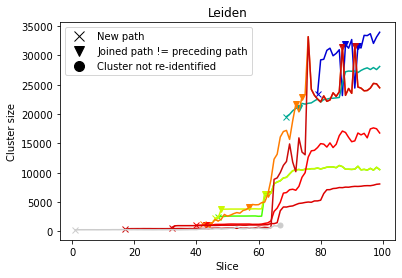

Slice 24 path len = 1
Slice 40 path len = 1
Slice 42 path len = 1
{'96': 0, '95': 1, '84': 2, '83': 3, '80': 4, '78': 5, '77': 6, '72': 7, '71': 8, '70': 9, '69': 10, '63': 11, '62': 12, '58': 13, '57': 14, '55': 15, '54': 16, '53': 17, '46': 18, '44': 19, '43': 20, '42': 21, '41': 22, '39': 23, '32': 24, '31': 25, '25': 26, '23': 27, '17': 28, '1': 29}


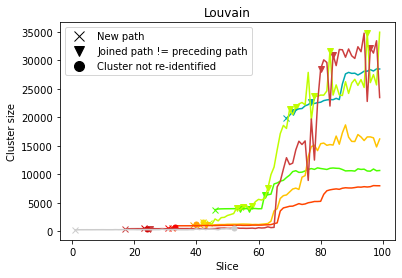

{'79': 0, '73': 1, '68': 2, '64': 3, '46': 4, '39': 5, '32': 6, '17': 7, '1': 8}


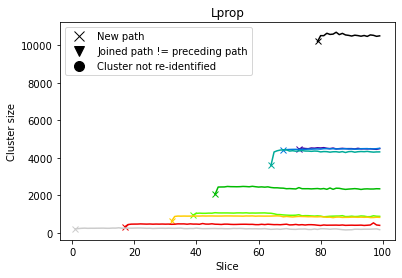

{'79': 0, '78': 1, '55': 2, '53': 3, '52': 4, '50': 5, '45': 6, '44': 7, '42': 8, '41': 9, '39': 10, '37': 11, '36': 12, '20': 13, '19': 14, '6': 15, '5': 16, '3': 17, '1': 18}


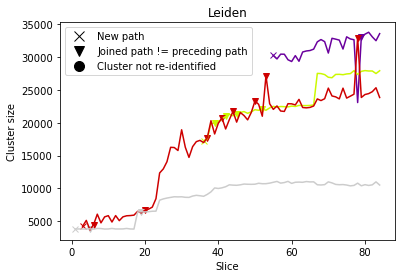

{'55': 0, '54': 1, '52': 2, '50': 3, '49': 4, '42': 5, '40': 6, '39': 7, '38': 8, '37': 9, '36': 10, '35': 11, '34': 12, '33': 13, '32': 14, '18': 15, '12': 16, '11': 17, '9': 18, '8': 19, '7': 20, '1': 21}


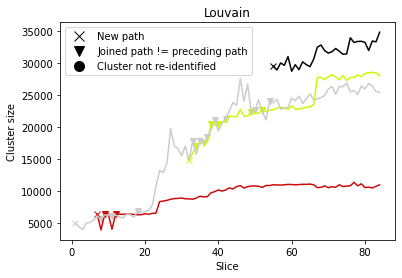

{'54': 0, '45': 1, '44': 2, '43': 3, '35': 4, '34': 5, '27': 6, '23': 7, '1': 8}


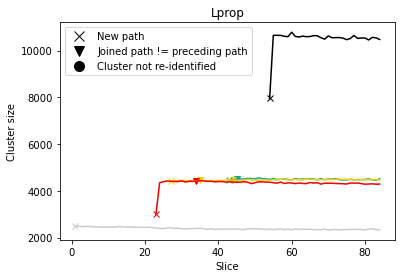

{'39': 0, '37': 1, '27': 2, '1': 3}


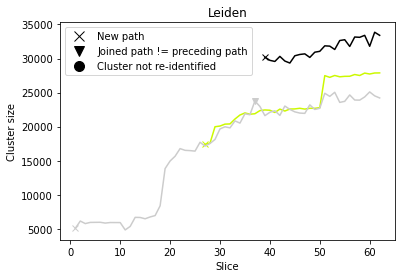

{'58': 0, '57': 1, '56': 2, '55': 3, '39': 4, '38': 5, '37': 6, '35': 7, '33': 8, '32': 9, '28': 10, '12': 11, '7': 12, '5': 13, '2': 14, '1': 15}


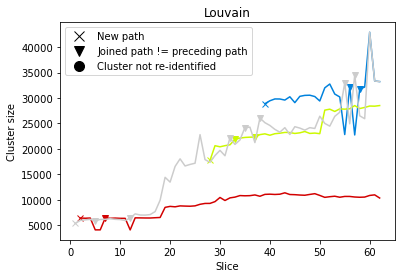

{'38': 0, '33': 1, '23': 2, '18': 3, '1': 4}


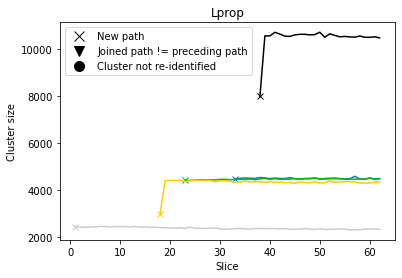

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines



exps = ["6","600","800"]
methods = ["Leiden","Louvain", "Lprop"]
for exp in exps:
    for met in methods:
        path_2_file = f"../../experiment{exp}/statistics/Cluster_tracker/{met}/tracking_all_branches_largest_cluster_in_each_slice.txt"
        
        check_exp = exp == "6" and met != "Lprop"

        all_dict = {}

        #branches = []
        #switch_ids = []
        #switch_sizes = []

        if check_exp:
            break_dict = {}
            break_of_branch = f"../../experiment{exp}/statistics/Cluster_tracker/{met}/break_off_branches.txt"
            with open(break_of_branch,"r") as bf:
                lines = bf.readlines()
                for line in lines:
                    elems = line.split(",")
                    break_dict[elems[0]] = int(elems[-1]) - int(elems[0]) #Gives correct index, easier

        #print(break_dict)


     
        path_to_save = f"../../p_2_overleaf/experiment{exp}/{met}/"
        first = True

        with open(path_2_file,"r") as inff:
            lol = inff.readline()
            lines = inff.readlines()
            for line in lines:
                vals = line.split(":")
                if first:
                    num_slices = int(vals[-1])
                    first = False
                id = int(vals[0])
                all_dict[str(id)] = {}
                b_path = vals[1].strip("[]")
                b_path = b_path.split(",")
                b_path = [int(i) for i in b_path]
                sizes = vals[-2].strip("[]")
                sizes = sizes.split(",")
                sizes = [int(i) for i in sizes]

                all_dict[str(id)]["branch"] = b_path
                all_dict[str(id)]["size"] = sizes

        
        
        if check_exp:
            for k in break_dict.keys():
                break_idx = break_dict[k]
                all_dict[k]["branch"] = all_dict[k]["branch"][:break_idx]
                all_dict[k]["size"] = all_dict[k]["size"][:break_idx]


        max_size = 0
        for k in all_dict.keys():
            check_sizes = all_dict[k]["size"]
            mm = max(check_sizes)
            if mm > max_size:
                max_size = mm


        switch_dict = {}
        switch_dict["1"] = {"new_path" : True}
        keys_list = list(all_dict.keys())
        for k in range(1,len(keys_list)):
            br_m1 = all_dict[keys_list[k-1]]["branch"]
            br = all_dict[keys_list[k]]["branch"]
            try:
                if br[0] != br_m1[1]:
                    switch_dict[keys_list[k]] = {"new_path" : True}
                
            except IndexError:
                print(f"Slice {keys_list[k-1]} path len = {len(br_m1)}")
                switch_dict[keys_list[k]] = {"new_path" : True}


        #rev_keys = keys_list[::-1]
        rev_switch_keys = list(switch_dict.keys())[::-1]
        count_keys = list(switch_dict.keys())

        for rk in rev_switch_keys:
            count_keys = count_keys[:-1]
            c_p = all_dict[rk]["branch"][0]
            for lk in range(1,int(rk)):#count_keys:  
                slice_key = str(lk)
                try:
                    o_p = all_dict[slice_key]["branch"][int(rk)-lk]
                except IndexError:
                    o_p = -1
                if c_p == o_p:
                    switch_dict[rk]["new_path"] = False
                    switch_dict[rk]["s_id"] = str(lk)
                    break

        rev_switch_keys = list(switch_dict.keys())[::-1]
        count_keys = list(switch_dict.keys())

        color_dict = {}
        for i in range(len(rev_switch_keys)):
            color_dict[rev_switch_keys[i]] = i 

        #slices = [i for i in range(1,num_slices+1)]
        cmap = cm.get_cmap('nipy_spectral', len(count_keys)) #nipy_spectral
        
        for j in rev_switch_keys:
            cc = color_dict[j]
            jj = int(j)
            y = all_dict[j]["size"]
            x = [i for i in range(jj, jj + len(y))]

            if switch_dict[j]["new_path"]:
                mark= "x"
                plt.plot(jj,y[0],marker = mark,color = cmap(cc))
                plt.plot(x,y, color = cmap(cc))
                if x[-1] != num_slices:
                    plt.plot(x[-1],y[-1], marker = "o", color = cmap(cc), markersize = 5)

            else:
                mark = "v"
                id_color_old_path = color_dict[switch_dict[j]["s_id"]]
                plt.plot(jj,y[0],marker = mark,color = cmap(id_color_old_path))

           

                


        #for s in slices:
            #plt.vlines(s, 0, max_size,linestyles ="solid", colors ="k", alpha = 0.2, linewidth = 0.1)
            
        plt.xlabel("Slice")
        
        x_mark = mlines.Line2D([], [], color='k', marker='x', linestyle='None',markersize=10, label='New path')
        v_mark = mlines.Line2D([], [], color='k', marker='v', linestyle='None',markersize=10, label='Joined path != preceding path')
        o_mark = mlines.Line2D([], [], color='k', marker='o', linestyle='None',markersize=10, label='Cluster not re-identified')

        plt.legend(handles=[x_mark,v_mark,o_mark])

        plt.title(f"{met}")
        plt.ylabel("Cluster size")
        #plt.grid()
        #plt.yscale("log")
        #plt.show()
        #plt.savefig(f"BRANCH_TEST_{met}.pdf")
        #plt.clf()
        plt.savefig(path_to_save + "branch.pdf")
        plt.yscale("log")
        plt.savefig(path_to_save + "ylog_branch.pdf")
        plt.clf()
        #plt.show()
        
        